In [4]:
# 1. Read in the Data

#from ydata_profiling import ProfileReport

#from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pyarrow.feather as feather

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ab_df = pd.read_feather('processed_data/AB_cleaned.feather')
# mn_df = pd.read_feather('processed_data/MN_cleaned.feather')
# zy_df = pd.read_feather('processed_data/ZY_cleaned.feather')
#Hinzufügen der Spalte Keys für die Identifikation der Flüge

ab_df = pd.read_feather('data_key.AB_key.feather')
mn_df = pd.read_feather('data_key/MN_key.feather')
zy_df = pd.read_feather('data_key/ZY_key.feather')

data = pd.concat([ab_df, mn_df, zy_df])

C:\Users\Katha\AppData\Local\Temp\ipykernel_10208\749946633.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([ab_df, mn_df, zy_df])


In [5]:
ab_df.head()

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent,keys,timestamp
0,2024-04-30 04:01:00,33766922,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
1,2024-04-30 04:01:00,33766923,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
2,2024-04-30 04:01:00,33766924,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
3,2024-04-30 04:01:00,33766925,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
4,2024-04-30 04:01:00,33766926,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,1571.0,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00


In [6]:
# ab_df['keys'] = ab_df['airline_code'].astype(str) + '_' + ab_df['flight_number'].astype(str) + '_' + ab_df['departure_airport'].astype(str) + '_' + ab_df['flight_date'].astype(str)
# mn_df['keys'] = mn_df['airline_code'].astype(str) + '_' + mn_df['flight_number'].astype(str) + '_' + mn_df['departure_airport'].astype(str) + '_' + mn_df['flight_date'].astype(str)
# zy_df['keys'] = zy_df['airline_code'].astype(str) + '_' + zy_df['flight_number'].astype(str) + '_' + zy_df['departure_airport'].astype(str) + '_' + zy_df['flight_date'].astype(str)

# ab_df["timestamp"]= ab_df.index
# mn_df["timestamp"]= mn_df.index
# zy_df["timestamp"]= zy_df.index

# ab_df = ab_df.reset_index()
# mn_df = mn_df.reset_index()
# zy_df = zy_df.reset_index()

# ab_df.to_feather("data_key.AB_key.feather")
# mn_df.to_feather("data_key.MN_key.feather")
# zy_df.to_feather("data_key.ZY_key.feather")

# 2. Understanding the Data

In [7]:
data.head()

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent,keys,timestamp
0,2024-04-30 04:01:00,33766922,AB,2373,30,IXB,service-acco,CheckinMsgProcessor,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
1,2024-04-30 04:01:00,33766923,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
2,2024-04-30 04:01:00,33766924,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
3,2024-04-30 04:01:00,33766925,AB,2373,30,IXB,service-acco,CalculateWeightAndTrimAction,44296.0,38.53,...,NaN,None,NaN,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00
4,2024-04-30 04:01:00,33766926,AB,2373,30,IXB,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,1571.0,Bagdogra Airport,Siliguri,IN-WB,India,AS,AB_2373_IXB_30,2024-04-30 04:01:00


In [8]:
data.tail()

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent,keys,timestamp
429750,2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429751,2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,NaN,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429752,2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429753,2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,0.0,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429754,2024-05-07 09:20:24,375567251,ZY,3616,7,VCP,service-acco,PAXBOOKINGINMsgProcessor,NaN,NaN,...,NaN,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT


In [9]:
data.shape

(2248299, 66)

In [10]:
data.dtypes

creation_time    datetime64[ns]
id                       object
airline_code             object
flight_number             int32
flight_date               int32
                      ...      
region                   object
country_name             object
continent                object
keys                     object
timestamp        datetime64[ns]
Length: 66, dtype: object

In [11]:
data.describe()

,creation_time,flight_number,flight_date,START_WI weight,START_WI index,DO_WI weight,DO_WI index,PAX_WI weight,PAX_WI index,TOTAL_DEADLOAD_WI weight,...,TAIL_TIPPING_WI weight,TAIL_TIPPING_WI index,INDEX_OUT_OF_BALANCE,LOAD_TO_AFT,LOAD_TO_FWD,ESTIMATED_TRAFFIC_LOAD,ESTIMATED_ZFW,DELTA_ZFW,Total bag weight,timestamp
count,2248299,2.248299e+06,2.248299e+06,3.665950e+05,366595.000000,3.418880e+05,341881.000000,3.665950e+05,307793.000000,2.830810e+05,...,3.418880e+05,341888.000000,23148.000000,6818.000000,579.000000,3.055810e+05,3.418880e+05,1.867950e+05,2.514870e+05,709595
mean,2024-05-03 17:42:30.504103168,2.381134e+03,7.198636e+00,6.206915e+04,44.924934,8.453828e+04,46.397202,1.199014e+04,7.442871,1.052000e+05,...,9.833642e+04,84.872583,8.214977,2812.661088,328.993886,1.574375e+04,9.219580e+04,3.561927e+02,3.113199e+03,2024-05-03 18:18:41.336996352
min,2024-04-30 04:01:00,0.000000e+00,1.000000e+00,1.238800e+04,4.650000,1.264800e+04,0.950000,0.000000e+00,0.000000,4.193300e+04,...,1.264800e+04,0.950000,0.030000,4.330000,5.530000,0.000000e+00,1.264800e+04,0.000000e+00,0.000000e+00,2024-04-30 04:01:00
25%,2024-05-01 22:04:36,1.276000e+03,2.000000e+00,4.188900e+04,37.430000,4.329400e+04,37.420000,1.393000e+03,0.000000,4.497100e+04,...,4.964396e+04,68.470000,4.540000,553.710000,79.670000,1.149100e+04,5.381800e+04,0.000000e+00,9.750000e+02,2024-05-02 00:06:01
50%,2024-05-03 13:38:19,2.102000e+03,4.000000e+00,4.410600e+04,42.120000,4.475700e+04,41.220000,1.136800e+04,5.800000,4.618000e+04,...,5.448600e+04,86.050000,7.400000,1679.280000,232.590000,1.401500e+04,5.797100e+04,0.000000e+00,1.391000e+03,2024-05-03 17:06:58
75%,2024-05-05 12:53:16,2.563000e+03,6.000000e+00,4.502400e+04,51.500000,4.552300e+04,53.040000,1.300200e+04,12.080000,4.936900e+04,...,6.164872e+04,96.260000,11.130000,1679.280000,426.990000,1.570800e+04,6.140650e+04,2.360000e+02,1.820000e+03,2024-05-05 13:54:01
max,2024-05-07 09:24:46,9.902000e+03,3.000000e+01,1.231061e+07,83.020000,1.283106e+07,1053.150000,2.010615e+06,45.510000,1.401068e+07,...,1.104431e+09,1127.830000,39.730000,181035.860000,11086.290000,2.710681e+06,1.562107e+07,1.107050e+06,1.030103e+07,2024-05-07 09:16:30
std,NaN,1.498802e+03,8.468916e+00,2.706786e+05,8.896044,6.091942e+05,35.147258,6.304777e+04,7.865908,7.309253e+05,...,2.736155e+06,58.821576,4.879979,16528.808171,556.869830,6.486619e+04,5.736328e+05,5.033826e+03,1.234162e+05,NaN


In [12]:
print("airlines")
print(data["airline_code"].unique())
print("flight number")
print(data["flight_number"].unique())
print("departure airport")
print(data["departure_airport"].unique())
print("action name")
print(data["action_name"].unique())
print("country name")
print(data["country_name"].unique())
print("city")
print(data["city"].unique())
print("airport name")
print(data["airport_name"].unique())

airlines
['AB' 'MN' 'ZY']
flight number
[2373 2371 2385 ... 9902 2213 2414]
departure airport
['IXB' 'GOX' 'BOM' 'BLR' 'AMD' 'DEL' 'VNS' 'BBI' 'IXZ' 'COK' 'GAU' 'GWL'
 'LKO' 'MAA' 'AYJ' 'PNQ' 'CCU' 'HYD' 'IXA' 'SXR' 'DOH' 'SIN' 'DXB' 'SIG'
 'RUP' 'DUB' 'MAN' 'ORK' 'LHR' 'MAD' 'MUC' 'AGP' 'NOC' 'EWR' 'JFK' 'IAD'
 'ORD' 'MCO' 'YYZ' 'BDL' 'BOS' 'LAX' 'SFO' 'PHL' 'SNN' 'CLE' 'SEA' 'CDG'
 'VCE' 'FAO' 'BGI' 'PGF' 'MSP' 'NAP' 'BOD' 'FCO' 'DUS' 'CMH' 'TLS' 'LPA'
 'BEL' 'SDU' 'VCP' 'SLZ' 'SSA' 'GRU' 'BVB' 'CGH' 'IMP' 'MCZ' 'REC' 'NAT'
 'CGB' 'GYN' 'POA' 'VIX' 'CWB' 'IPN' 'IGU' 'GIG' 'PVH' 'MOC' 'BSB' 'MAO'
 'CGR' 'PPB' 'UDI' 'CNF' 'FLN' 'PNZ' 'RAO' 'BPS' 'XAP' 'CPV' 'SJP' 'FLL'
 'FOR' 'LDB' 'JTC' 'MGF' 'JPA' 'JOI' 'JDO' 'AJU' 'NVT' 'STM' 'THE' 'ORY'
 'FEN' 'LIS' 'CAC' 'VDC' 'UBA' 'ARU' 'IZA' 'PFB' 'CMG' 'CAW' 'URG' 'BYO'
 'CKS' 'LEC' 'SJL' 'MAB' 'MII' 'BVH' 'OAL' 'OPS' 'MCP' 'EEA' 'IOS' 'PET'
 'PMW' 'CFB' 'ITB' 'TFF' 'GVR' 'MVF' 'RVD' 'GNM' 'BRA' 'FEC' 'GPB' 'AAX'
 'JJG' 'PGZ' 'PTO' 'PMG' 'ROO'

## 2.1 Data Visualizations

<Axes: xlabel='count', ylabel='departure_airport'>

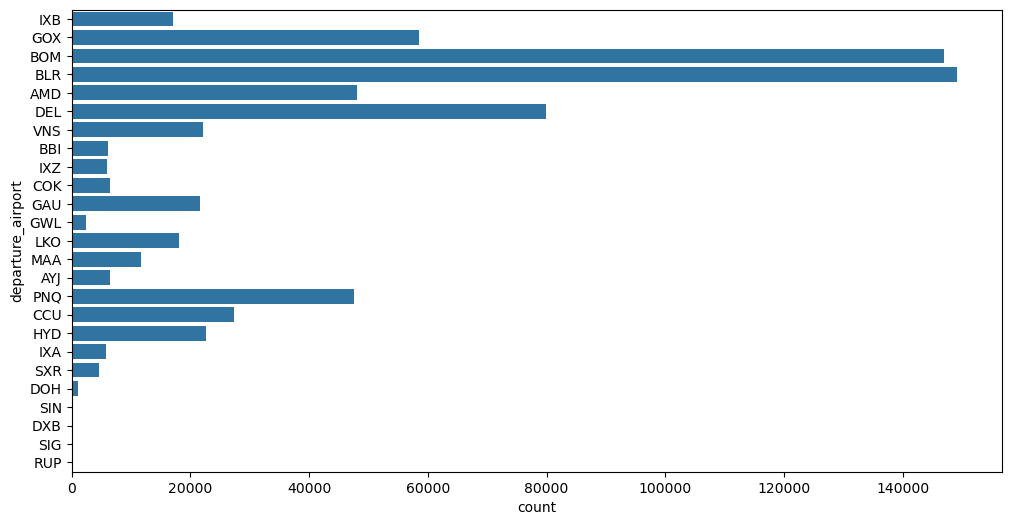

In [51]:
# Filter data for a pre-selected airline
selected_airline = 'AB' # ZY, MN
filtered_data = data[data['airline_code']==selected_airline]

# Plot the distribution of departure airports
plt.figure(figsize=(12, 6))
sns.countplot(y='departure_airport', data=filtered_data, order=filtered_data['departure_airport'])

In [52]:
# Identify the top 5 most occurring actions
top_actions = filtered_data.groupby("action_name").count().sort_values(by="id", ascending=False)[:5]
# Count the occurrences of each user_name
user_counts = filtered_data['user_name'].unique()
# Filter for two specific departure airports
filtered_airports = ['DUS', 'BEL']

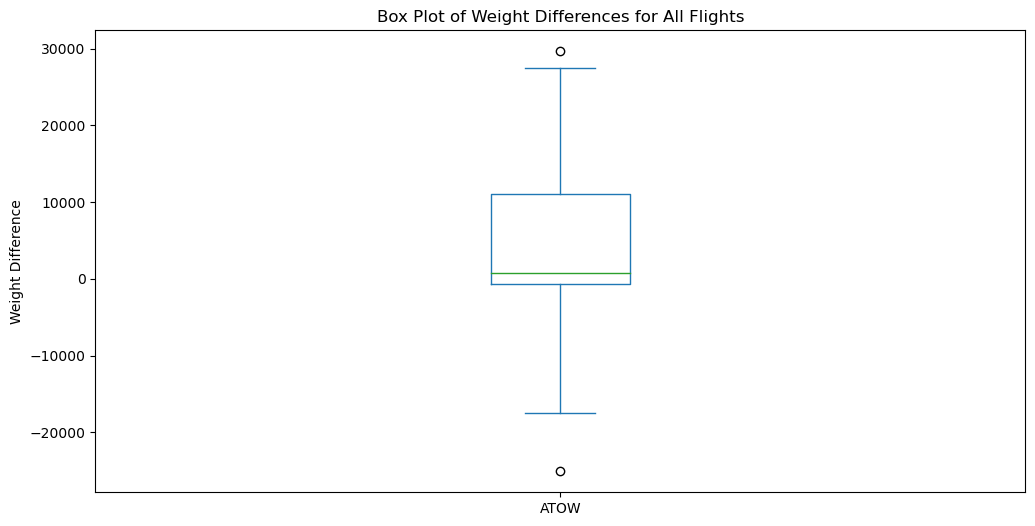

In [53]:
# Get the first 'ATOW' and the last 'ATOW' for each flight
first_weight = filtered_data.sort_values(by='timestamp').groupby('flight_number')['ATOW'].first()
last_weight = filtered_data.sort_values(by='timestamp').groupby('flight_number')['ATOW'].last()

# Calculate the difference
difference = last_weight - first_weight

# Plot the difference
plt.figure(figsize=(12, 6))
difference.plot(kind='box')
plt.ylabel('Weight Difference')
plt.title('Box Plot of Weight Differences for All Flights')
plt.show()

In [54]:
data["keys"].unique()

array(['AB_2373_IXB_30', 'AB_2371_GOX_30', 'AB_2385_BOM_30', ...,
       'ZY_5338_VCP_3', 'ZY_5285_CGR_3', 'ZY_3700_VCP_3'], dtype=object)

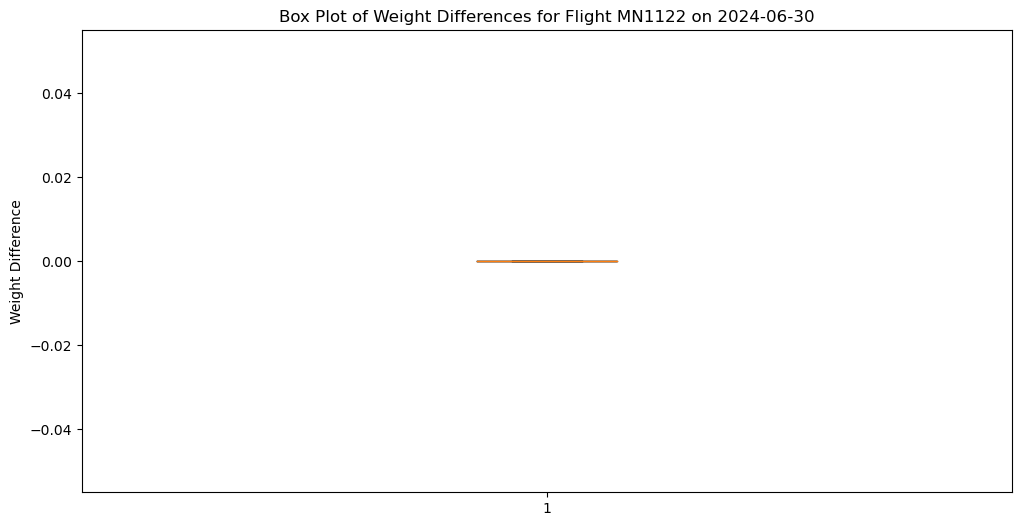

                           id airline_code  flight_number  flight_date  \
creation_time                                                            
2024-04-30 04:01:00  33766922           AB           2373           30   
2024-04-30 04:01:00  33766923           AB           2373           30   
2024-04-30 04:01:00  33766924           AB           2373           30   
2024-04-30 04:01:00  33766925           AB           2373           30   
2024-04-30 04:01:00  33766926           AB           2373           30   
...                       ...          ...            ...          ...   
2024-05-07 05:53:04  34478786           AB           2373            7   
2024-05-07 08:00:07  34489955           AB           2373            7   
2024-05-07 08:00:07  34489956           AB           2373            7   
2024-05-07 08:06:47  34490250           AB           2373            7   
2024-05-07 08:06:47  34490251           AB           2373            7   

                    departure_airport

In [55]:
# Filter the data for flight 2373
flight_data = filtered_data[filtered_data['flight_number'] == 2373]

# Gruppieren nach 'keys'
grouped = filtered_data.groupby('keys')

# Flugdaten für einen spezifischen Flug abrufen
flight_data_specific = grouped.get_group("AB_2373_IXB_30")

# Differenz des Gewichts berechnen
flight_data_specific = flight_data_specific.sort_values(by='timestamp')
flight_data_specific['Difference'] = flight_data_specific['ATOW'].diff()

# Plotten der Gewichtsdifferenz
plt.figure(figsize=(12, 6))
plt.boxplot(flight_data_specific['Difference'].dropna())
plt.ylabel('Weight Difference')
plt.title('Box Plot of Weight Differences for Flight MN1122 on 2024-06-30')
plt.show()

# Ausgabe der gefilterten Daten
print(filtered_data[filtered_data['flight_number'] == 2373])
print(flight_data_specific)

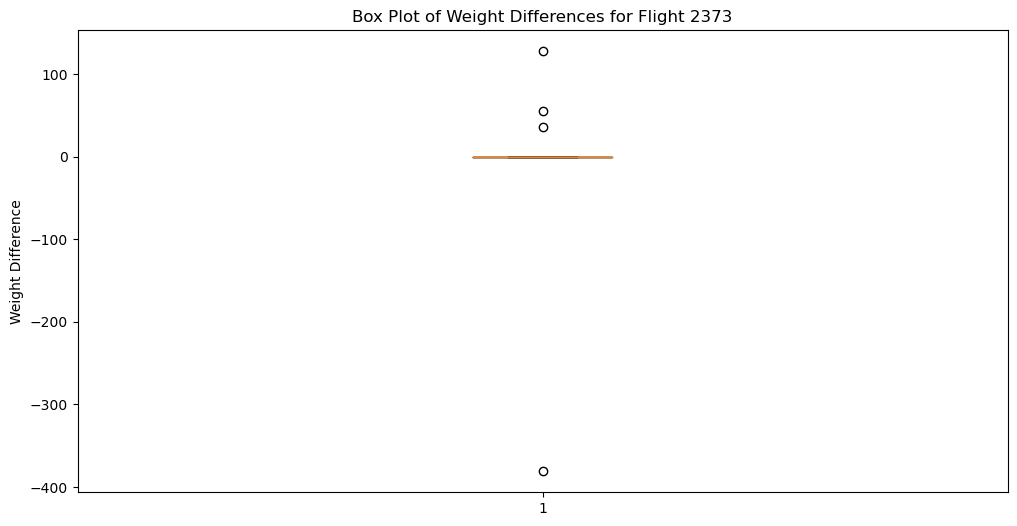

Varianz der Abweichung der Vorhersage: 3446.8333333333335
Mittelwert der Abweichung der Vorhersage: -3.2857142857142856


In [58]:
# Alternativ: Filter the data for flight 2373 using 'flight_number'
flight_data = filtered_data[filtered_data['flight_number'] == 2373]

# Gruppieren nach 'flight_number'
grouped = filtered_data.groupby('flight_number')

# Flugdaten für die flight_number 2373 abrufen
flight_data = grouped.get_group(2373)

# Differenz des Gewichts berechnen
flight_data = flight_data.sort_values(by='timestamp')
flight_data['Difference'] = flight_data['ATOW'].diff()

# Creating plot
plt.figure(figsize=(12, 6))
plt.boxplot(flight_data['Difference'].dropna())
plt.ylabel('Weight Difference')
plt.title('Box Plot of Weight Differences for Flight 2373')
plt.show()

# Berechnung der Varianz und des Mittelwerts der Gewichtsdifferenz
tow_data = flight_data['Difference'].dropna()
print("Varianz der Abweichung der Vorhersage: " + str(tow_data.var()))
print("Mittelwert der Abweichung der Vorhersage: " + str(tow_data.mean()))

# Erstellen der Modelle

## Berechnen der Differenz

In [28]:
list_flight_numbers = data["keys"].unique()
list_difference = []
list_actual_tow = []
list_estimated_tow = []
list_flights_with_tow = []

list_flight_numbers

array(['AB_2373_IXB_30', 'AB_2371_GOX_30', 'AB_2385_BOM_30', ...,
       'ZY53383VCP', 'ZY52853CGR', 'ZY37003VCP'], dtype=object)

In [129]:
# Über jeden Flight-Number-Key iterieren
for flight_key in list_flight_numbers:
    flight_data = data[data['keys'] == flight_key]
    
    if flight_data['ATOW'].notnull().any():  # Prüfen, ob mindestens ein ATOW vorhanden ist
        actual_tow = flight_data['ATOW'].dropna().iloc[-1]  # Letzten ATOW-Wert holen
        estimated_tow = flight_data['ESTIMATED_TRAFFIC_LOAD'].dropna().iloc[0] if flight_data['ESTIMATED_TRAFFIC_LOAD'].notnull().any() else None  # Ersten ETOW-Wert holen, falls vorhanden
        
        if estimated_tow is not None:
            difference = actual_tow - estimated_tow  # Differenz berechnen
            list_difference.append(difference)
            list_actual_tow.append(actual_tow)
            list_estimated_tow.append(estimated_tow)
            list_flights_with_tow.append(flight_key)


In [130]:
df_difference = pd.DataFrame({'keys': list_flights_with_tow,'Actual TOW': list_actual_tow,'Estimated TOW': list_estimated_tow,'Difference': list_difference})
df_difference.to_csv("data/difference.csv")

In [131]:
df_difference = pd.read_csv("data/difference.csv")

List of Flight Numbers with TOW: ['AB_2373_IXB_30', 'AB_2371_GOX_30', 'AB_2385_BOM_30', 'AB_2462_BLR_30', 'AB_2533_AMD_30', 'AB_2607_DEL_30', 'AB_2625_DEL_30', 'AB_2411_DEL_30', 'AB_2492_VNS_30', 'AB_2147_BOM_30', 'AB_2172_BOM_30', 'AB_2382_BBI_30', 'AB_2486_IXZ_30', 'AB_2518_BOM_30', 'AB_2519_COK_30', 'AB_2372_GAU_30', 'AB_2406_DEL_30', 'AB_2148_GWL_30', 'AB_2627_GOX_30', 'AB_2526_LKO_30', 'AB_2498_BOM_30', 'AB_2380_BOM_30', 'AB_2377_BLR_30', 'AB_2142_GOX_30', 'AB_2608_DEL_30', 'AB_2378_DEL_30', 'AB_2486_MAA_30', 'AB_2364_BLR_30', 'AB_2128_DEL_30', 'AB_2608_AYJ_30', 'AB_2127_BOM_30', 'AB_2851_IXB_30', 'AB_2384_BBI_30', 'AB_2394_BOM_30', 'AB_2497_VNS_30', 'AB_2463_GOX_30', 'AB_2383_PNQ_30', 'AB_2108_AMD_30', 'AB_2503_BOM_30', 'AB_2173_CCU_30', 'AB_2534_GOX_30', 'AB_2379_GOX_30', 'AB_2323_GAU_30', 'AB_2431_HYD_30', 'AB_2432_BLR_30', 'AB_2527_BLR_30', 'AB_2451_BOM_30', 'AB_2324_GAU_30', 'AB_2524_BOM_30', 'AB_2465_GOX_30', 'AB_2324_IXA_30', 'AB_2491_BOM_30', 'AB_2110_BOM_30', 'AB_2386_IXB

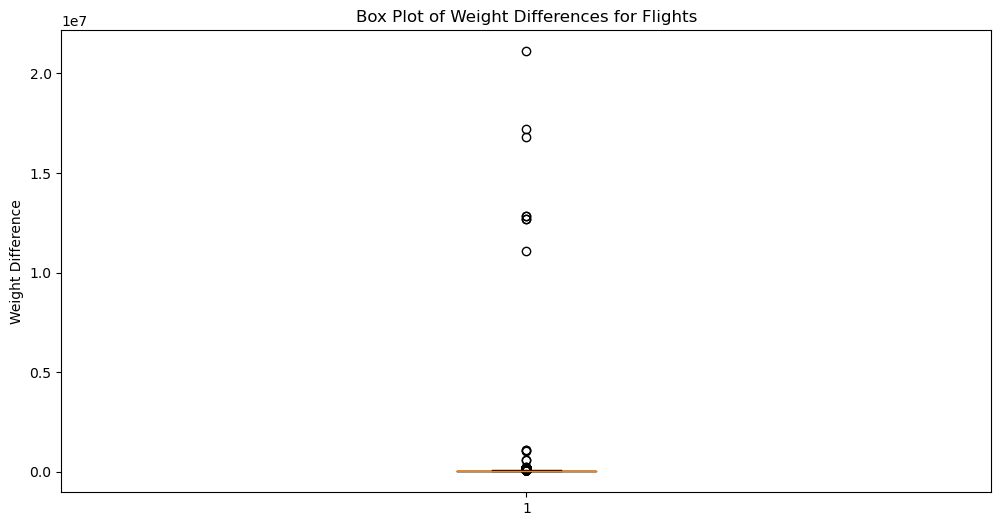

In [132]:
# Ergebnisse anzeigen
print("List of Flight Numbers with TOW:", list_flights_with_tow)
print("List of Actual TOWs:", list_actual_tow)
print("List of Estimated TOWs:", list_estimated_tow)
print("List of Differences:", list_difference)

# Optional: Boxplot erstellen
plt.figure(figsize=(12, 6))
plt.boxplot(list_difference)
plt.ylabel('Weight Difference')
plt.title('Box Plot of Weight Differences for Flights')
plt.show()

## Erstellen der Trainingsdaten

In [134]:
df_learn = data.drop(columns=['id',  'user_name', 'action_name', 'START_WI weight','START_WI index', 'DO_WI weight', 'DO_WI index', 'PAX_WI weight',
                                'PAX_WI index', 'TOTAL_DEADLOAD_WI weight', 'TOTAL_DEADLOAD_WI index',
                                'TOTAL_LOAD_WI', 'TOTAL_TRAFFIC_LOAD', 'FUEL_INDEX', 'AZFW', 'ATOW',
                                'ALAW', 'ATXW', 'AFT_LIMIT_ZFW', 'FWD_LIMIT_ZFW', 'AFT_LIMIT_TOW',
                                'FWD_LIMIT_TOW', 'AFT_LIMIT_LAW', 'FWD_LIMIT_LAW', 'LIZFW', 'LITOW',
                                'LILAW', 'MAC_AT_ZFW', 'MAC_AT_TOW', 'MAC_AT_LAW', 'DEADLOAD_MAC',
                                'UNDERLOAD', 'LIMITING_WEIGHT', 'ALLOWED TOW', 'ALLOWED ZFW',
                                'ALLOWED LAW', 'ALLOWED TXW', 'STABTO', 'OPTIMAL_TRIM',
                                'IDEAL_ADDITIONAL_LOAD_AFT', 'IDEAL_ADDITIONAL_LOAD_FWD',
                                'TAIL_TIPPING_WI weight', 'TAIL_TIPPING_WI index',
                                'TAIL_TIPPING_INDEX_EXCEEDED', 'FWD_MOVABLE_PAX', 'AFT_MOVABLE_PAX',
                                'INDEX_OUT_OF_BALANCE', 'LOAD_TO_AFT', 'LOAD_TO_FWD',
                                'ESTIMATED_TRAFFIC_LOAD', 'ESTIMATED_ZFW', 'DELTA_ZFW',
                                'ZFW_TOLERANCE_EXCEEDED', 'Total bag weight'])
df_learn = df_learn[df_learn['keys'].isin(list_flights_with_tow)]

Index(['airline_code', 'flight_number', 'flight_date', 'departure_airport',
       'airport_name', 'city', 'region', 'country_name', 'continent', 'keys',
       'timestamp'],
      dtype='object')

In [137]:
# Initialisierung einer Liste zur Speicherung der gefilterten Zeilen
filtered_rows = []
# Schleife über die Liste der zu behaltenden keys
for key in list_flights_with_tow:
    # Finden der ersten Zeile im DataFrame, die dem aktuellen key entspricht
    first_match = df_learn[df_learn['keys'] == key].iloc[0]
    filtered_rows.append(first_match)

# Erstellen eines neuen DataFrames aus den gefilterten Zeilen
filtered_df = pd.DataFrame(filtered_rows)
df_learn = filtered_df
# Anzeige des gefilterten DataFrames
print(filtered_df)

                    airline_code  flight_number  flight_date  \
2024-04-30 04:01:00           AB           2373           30   
2024-04-30 04:01:01           AB           2371           30   
2024-04-30 04:01:01           AB           2385           30   
2024-04-30 04:01:01           AB           2462           30   
2024-04-30 04:01:01           AB           2533           30   
...                          ...            ...          ...   
2024-05-06 18:41:37           MN           1030            8   
2024-05-06 18:41:37           MN           1110            8   
2024-05-06 18:41:37           MN           1134            8   
2024-05-06 18:42:35           MN           1044            8   
2024-05-06 18:42:35           MN           1088            8   

                    departure_airport  \
2024-04-30 04:01:00               IXB   
2024-04-30 04:01:01               GOX   
2024-04-30 04:01:01               BOM   
2024-04-30 04:01:01               BLR   
2024-04-30 04:01:01       

In [138]:
df_learn = pd.merge(df_learn, df_difference)

## Faktorisieren der Spalten und trainieren der Modelle

Mean Squared Error: 58963409644.03798
R^2 Score: 0.00021095407180948822


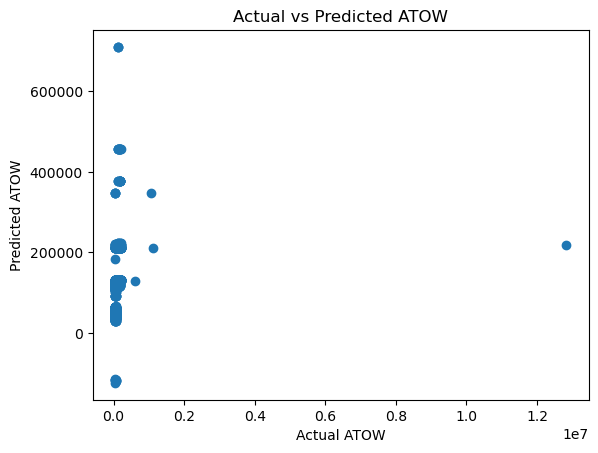

In [171]:
# Feature engineering: create numeric values for categorical features (if needed)
df_learn['airline_code'] = pd.factorize(df_learn['airline_code'])[0]
df_learn['departure_airport'] = pd.factorize(df_learn['departure_airport'])[0]
df_learn['airport_name'] = pd.factorize(df_learn['airport_name'])[0]
df_learn['city'] = pd.factorize(df_learn['city'])[0]
df_learn['region'] = pd.factorize(df_learn['region'])[0]
df_learn['country_name'] = pd.factorize(df_learn['country_name'])[0]
df_learn['continent'] = pd.factorize(df_learn['continent'])[0]
#df_learn['keys'] = pd.factorize(df_learn['keys'])[0]
#df_learn['flight_date'] = pd.to_datetime(df_learn['flight_date']).astype(int) / 10**9  # Convert to timestamp

# Prepare the feature and target variables
X = df_learn[['airline_code', 'flight_number', 'departure_airport',  'airport_name', #'keys','flight_date',
       'city', 'region', 'country_name', 'continent','Estimated TOW']]#, 'ETOW']]
y = df_learn['Actual TOW']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

list_test_etow = X_test["Estimated TOW"]
X_test = X_test.drop(columns="Estimated TOW")
X_train = X_train.drop(columns="Estimated TOW")
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


df_box_lin = pd.DataFrame({"Vorhersage": y_pred, "Estimated TOW":list_test_etow, "Actual TOW": y_test})

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ATOW')
plt.ylabel('Predicted ATOW')
plt.title('Actual vs Predicted ATOW')
plt.show()


In [172]:
print("Lineare Regression")
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

print("Erste Schätzung:")
# Evaluate the model
mse = mean_squared_error(y_test, df_box_lin["Estimated TOW"])
r2 = r2_score(y_test,df_box_lin["Estimated TOW"])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Lineare Regression
Mean Squared Error: 58963409644.03798
R^2 Score: 0.00021095407180948822
Erste Schätzung:
Mean Squared Error: 62752796443.978
R^2 Score: -0.06404224017588755


Mean Squared Error: 58963045701.38076
R^2 Score: 0.0002171251172804478


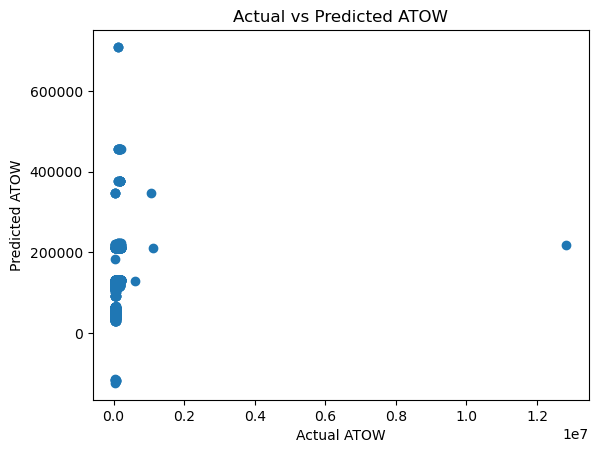

In [173]:
from sklearn.linear_model import Lasso

# Initialize the linear regression model
model = Lasso(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


df_box_las = pd.DataFrame({"Vorhersage": y_pred, "Estimated TOW":list_test_etow, "Actual TOW": y_test})

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ATOW')
plt.ylabel('Predicted ATOW')
plt.title('Actual vs Predicted ATOW')
plt.show()

Mean Squared Error: 58947820780.84952
R^2 Score: 0.00047528028273224887


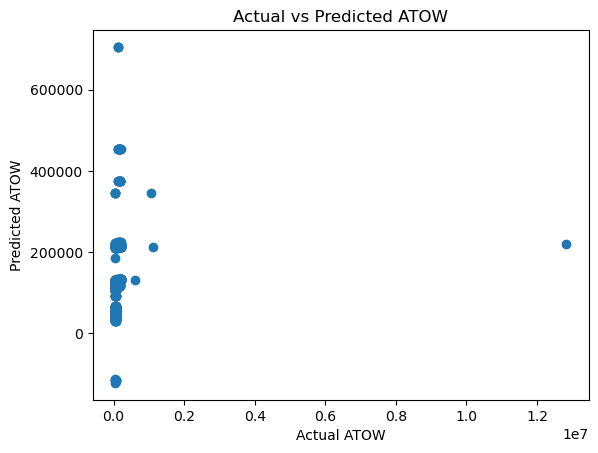

In [174]:
from sklearn.linear_model import Ridge

# Initialize the linear regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


df_box_rid = pd.DataFrame({"Vorhersage": y_pred, "Estimated TOW":list_test_etow, "Actual TOW": y_test})

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ATOW')
plt.ylabel('Predicted ATOW')
plt.title('Actual vs Predicted ATOW')
plt.show()

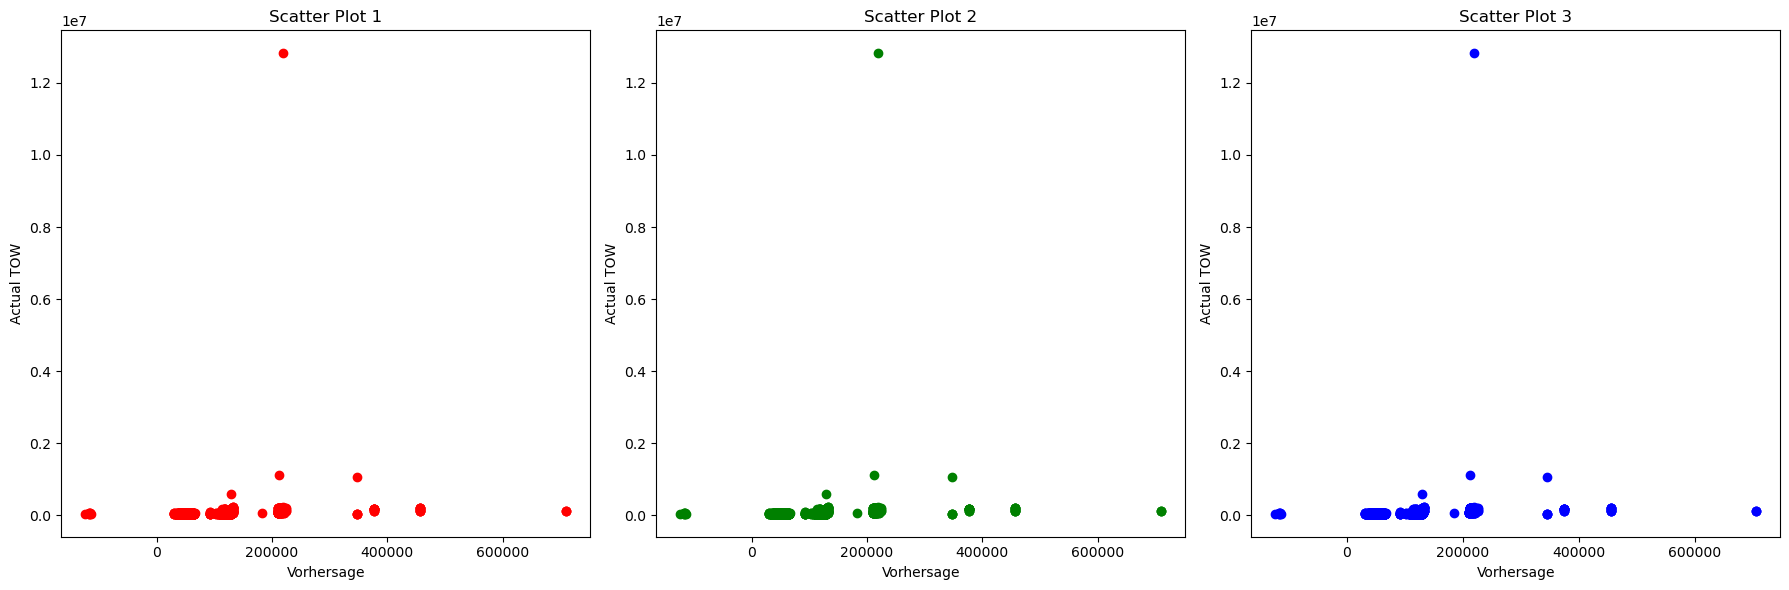

In [175]:
# Erstellen der Subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Scatterplot für df1
axs[0].scatter(df_box_lin['Vorhersage'], df_box_lin['Actual TOW'], color='r')
axs[0].set_title('Scatter Plot 1')
axs[0].set_xlabel('Vorhersage')
axs[0].set_ylabel('Actual TOW')

# Scatterplot für df2
axs[1].scatter(df_box_las['Vorhersage'], df_box_las['Actual TOW'], color='g')
axs[1].set_title('Scatter Plot 2')
axs[1].set_xlabel('Vorhersage')
axs[1].set_ylabel('Actual TOW')

# Scatterplot für df3
axs[2].scatter(df_box_rid['Vorhersage'], df_box_rid['Actual TOW'], color='b')
axs[2].set_title('Scatter Plot 3')
axs[2].set_xlabel('Vorhersage')
axs[2].set_ylabel('Actual TOW')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

## Analyse der Flughäfen: Top 5 und untere 5

In [71]:
# Anzahl der eindeutigen keys pro departure_airport zählen
unique_keys_per_airport = data.groupby('departure_airport')['keys'].nunique().reset_index().sort_values(by="keys")

# Spaltennamen anpassen für bessere Lesbarkeit
unique_keys_per_airport.columns = ['departure_airport', 'unique_keys_count']
# Ergebnis anzeigen
print(unique_keys_per_airport)

    departure_airport  unique_keys_count
98                MAD                  1
105               MEU                  1
149               RVY                  1
160               SOD                  1
162               SSV                  1
..                ...                ...
30                CGH                588
144               REC               1251
45                DUB               1421
37                CNF               1528
178               VCP               2462

[184 rows x 2 columns]


In [63]:
data.loc[data["keys"]=="AB_2373_IXB_30"]["ALLOWED TOW"].dropna().unique()[0]

75024.0

In [35]:
data.loc[data["keys"]=="AB_2373_IXB_30"]["ALLOWED TOW"].unique()
list_allowed_tow = []
list_flight_with_allowed = []
# Über jeden Flight-Number-Key iterieren
for flight_key in list_flight_numbers:
    flight_data = data[data['keys'] == flight_key]
    
    if flight_data['ALLOWED TOW'].notnull().any():  # Prüfen, ob mindestens ein ATOW vorhanden ist
        allowed_tow = flight_data['ATOW'].dropna().iloc[-1]  # Letzten ATOW-Wert holen
        list_allowed_tow.append(allowed_tow)
        list_flight_with_allowed.append(flight_key)
df_allowed_tow = pd.DataFrame({"keys": list_flight_with_allowed, "ALLOWED TOW":list_allowed_tow})

In [38]:
data["keys"].nunique()

18415

In [36]:
df_allowed_tow

,keys,ALLOWED TOW
0,AB_2373_IXB_30,70248.0
1,AB_2371_GOX_30,64635.0
2,AB_2385_BOM_30,69844.0
3,AB_2462_BLR_30,66038.0
4,AB_2533_AMD_30,71062.0
...,...,...
13205,ZY99006VCP,229487.0
13206,ZY99026VCP,186540.0
13207,ZY211129MGF,29785.0
13208,ZY221329REC,29683.0


In [20]:
# Liste der zu behaltenden Abflugorte
departure_airports_to_keep = unique_keys_per_airport.loc[unique_keys_per_airport["unique_keys_count"]==1]["departure_airport"]

# Filtern des DataFrames, um nur die Zeilen mit departure_airport aus der Liste zu behalten
df_bottom = data[data['departure_airport'].isin(departure_airports_to_keep)]

104570        NaN
104571        NaN
104632        NaN
104633        NaN
104640        NaN
           ...   
320426        NaN
320427    42500.0
320428        NaN
320679        NaN
320680        NaN
Name: ALLOWED TOW, Length: 1133, dtype: float64

In [16]:
unique_keys_per_airport.tail(5)

,departure_airport,unique_keys_count
30,CGH,588
144,REC,1251
45,DUB,1421
37,CNF,1528
178,VCP,2462


In [17]:
# Liste der zu behaltenden Abflugorte
departure_airports_to_keep = ["CGH", "REC", "DUB", "CNF", "VCP"]

# Filtern des DataFrames, um nur die Zeilen mit departure_airport aus der Liste zu behalten
df_top = data[data['departure_airport'].isin(departure_airports_to_keep)]
df_top

,creation_time,id,airline_code,flight_number,flight_date,departure_airport,user_name,action_name,START_WI weight,START_WI index,...,DELTA_ZFW,ZFW_TOLERANCE_EXCEEDED,Total bag weight,airport_name,city,region,country_name,continent,keys,timestamp
0,2024-04-30 04:01:40,137524935,MN,1262,30,DUB,human,StorePaxDataGuiAction,NaN,NaN,...,NaN,None,NaN,Dublin Airport,Dublin,IE-D,Ireland,EU,MN126230DUB,NaT
1,2024-04-30 04:01:40,137524936,MN,1262,30,DUB,human,StorePaxDataAction,NaN,NaN,...,NaN,None,NaN,Dublin Airport,Dublin,IE-D,Ireland,EU,MN126230DUB,NaT
2,2024-04-30 04:01:40,137524937,MN,1262,30,DUB,human,CalculateWeightAndTrimAction,NaN,NaN,...,NaN,None,NaN,Dublin Airport,Dublin,IE-D,Ireland,EU,MN126230DUB,NaT
3,2024-04-30 04:01:40,137524938,MN,1262,30,DUB,human,CalculateWeightAndTrimAction,42220.0,50.60,...,785.0,None,NaN,Dublin Airport,Dublin,IE-D,Ireland,EU,MN126230DUB,NaT
4,2024-04-30 04:01:40,137524939,MN,1262,30,DUB,human,StorePaxDataGuiAction,NaN,NaN,...,NaN,None,728.0,Dublin Airport,Dublin,IE-D,Ireland,EU,MN126230DUB,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429750,2024-05-07 09:20:24,375567187,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429751,2024-05-07 09:20:24,375567248,ZY,3616,7,VCP,service-acco,CreateBaggageLoadItemsAction,NaN,NaN,...,NaN,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429752,2024-05-07 09:20:24,375567249,ZY,3616,7,VCP,service-acco,CalculateWeightAndTrimAction,29275.0,64.59,...,0.0,None,NaN,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT
429753,2024-05-07 09:20:24,375567250,ZY,3616,7,VCP,service-acco,StorePaxDataAction,NaN,NaN,...,NaN,None,0.0,Viracopos International Airport,Campinas,BR-SP,Brazil,SA,ZY36167VCP,NaT


In [19]:
data.columns

Index(['creation_time', 'id', 'airline_code', 'flight_number', 'flight_date',
       'departure_airport', 'user_name', 'action_name', 'START_WI weight',
       'START_WI index', 'DO_WI weight', 'DO_WI index', 'PAX_WI weight',
       'PAX_WI index', 'TOTAL_DEADLOAD_WI weight', 'TOTAL_DEADLOAD_WI index',
       'TOTAL_LOAD_WI', 'TOTAL_TRAFFIC_LOAD', 'FUEL_INDEX', 'AZFW', 'ATOW',
       'ALAW', 'ATXW', 'AFT_LIMIT_ZFW', 'FWD_LIMIT_ZFW', 'AFT_LIMIT_TOW',
       'FWD_LIMIT_TOW', 'AFT_LIMIT_LAW', 'FWD_LIMIT_LAW', 'LIZFW', 'LITOW',
       'LILAW', 'MAC_AT_ZFW', 'MAC_AT_TOW', 'MAC_AT_LAW', 'DEADLOAD_MAC',
       'UNDERLOAD', 'LIMITING_WEIGHT', 'ALLOWED TOW', 'ALLOWED ZFW',
       'ALLOWED LAW', 'ALLOWED TXW', 'STABTO', 'OPTIMAL_TRIM',
       'IDEAL_ADDITIONAL_LOAD_AFT', 'IDEAL_ADDITIONAL_LOAD_FWD',
       'TAIL_TIPPING_WI weight', 'TAIL_TIPPING_WI index',
       'TAIL_TIPPING_INDEX_EXCEEDED', 'FWD_MOVABLE_PAX', 'AFT_MOVABLE_PAX',
       'INDEX_OUT_OF_BALANCE', 'LOAD_TO_AFT', 'LOAD_TO_FWD',
    

In [96]:
df_analyse = data.drop(columns=[ "creation_time",'user_name', 'action_name', 'START_WI weight',
       'START_WI index', 'DO_WI weight', 'DO_WI index', 'PAX_WI weight',
       'PAX_WI index', 'TOTAL_DEADLOAD_WI weight', 'TOTAL_DEADLOAD_WI index',
       'TOTAL_LOAD_WI', 'TOTAL_TRAFFIC_LOAD', 'FUEL_INDEX', 'AZFW', 'ATOW',
       'ALAW', 'ATXW', 'AFT_LIMIT_ZFW', 'FWD_LIMIT_ZFW', 'AFT_LIMIT_TOW',
       'FWD_LIMIT_TOW', 'AFT_LIMIT_LAW', 'FWD_LIMIT_LAW', 'LIZFW', 'LITOW',
       'LILAW', 'MAC_AT_ZFW', 'MAC_AT_TOW', 'MAC_AT_LAW', 'DEADLOAD_MAC',
       'UNDERLOAD', 'LIMITING_WEIGHT', 'ALLOWED TOW', 'ALLOWED ZFW',
       'ALLOWED LAW', 'ALLOWED TXW', 'STABTO', 'OPTIMAL_TRIM',
       'IDEAL_ADDITIONAL_LOAD_AFT', 'IDEAL_ADDITIONAL_LOAD_FWD',
       'TAIL_TIPPING_WI weight', 'TAIL_TIPPING_WI index',
       'TAIL_TIPPING_INDEX_EXCEEDED', 'FWD_MOVABLE_PAX', 'AFT_MOVABLE_PAX',
       'INDEX_OUT_OF_BALANCE', 'LOAD_TO_AFT', 'LOAD_TO_FWD',
       'ESTIMATED_TRAFFIC_LOAD', 'ESTIMATED_ZFW', 'DELTA_ZFW',
       'ZFW_TOLERANCE_EXCEEDED', 'Total bag weight'])


df_analyse = pd.DataFrame(df_analyse.drop_duplicates(subset='keys', keep='first'))
list_bottom = list(unique_keys_per_airport.loc[unique_keys_per_airport["unique_keys_count"]==1]["departure_airport"])
df_analyse.set_index('departure_airport', inplace=True)
df_analyse["departure_airport"] = df_analyse.index
list_top = unique_keys_per_airport.tail(5)["departure_airport"]
df_analyse.loc[list_bottom, 'Bottom_airport'] = 1
df_analyse.loc[list_top, 'Top_airport'] = 1

df_analyse = pd.DataFrame(df_analyse)
df_analyse = pd.merge(df_analyse, df_allowed_tow, on='keys', how='left')

<class 'pandas.core.frame.DataFrame'>


In [100]:
df_analyse.to_csv("tableau_data/top_bottom_airports.csv")

In [1]:
import pandas as pd

In [6]:
# Entfernen des Präfixes "difference_"


In [23]:
#df_analyse = pd.read_csv("tableau_data/top_bottom_airports.csv")
df_analyse.columns = ['top_bottom_' + col for col in df_analyse.columns]
#df_analyse.columns = [col.replace('top_bottom_', '') for col in df_analyse.columns]

#df_analyse = df_analyse.drop(columns=['Unnamed: 0.12', 'Unnamed: 0.10', 'Unnamed: 0.9'])
#df_analyse.to_csv("tableau_data/top_bottom_airports.csv")
df_analyse.columns

Index(['top_bottom_id', 'top_bottom_airline_code', 'top_bottom_flight_number',
       'top_bottom_flight_date', 'top_bottom_airport_name', 'top_bottom_city',
       'top_bottom_region', 'top_bottom_country_name', 'top_bottom_continent',
       'top_bottom_keys', 'top_bottom_timestamp',
       'top_bottom_departure_airport', 'top_bottom_Bottom_airport',
       'top_bottom_Top_airport', 'top_bottom_ALLOWED TOW'],
      dtype='object')

In [24]:
df_analyse.to_csv("tableau_data/top_bottom_airports.csv")